<a href="https://colab.research.google.com/github/Harsha1569/DSP_Lab/blob/main/Experiment_6/Experiment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Roll Number = 191EE123 <br> a = 1 + mod(123,3) = 1

In [61]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
from scipy.signal import chirp, spectrogram
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks



a = 1
pi = np.pi


%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})
!pip install control

import control

# **Problem** **1**. <br>
Part 1: <br>

Sampling Frequency ($F_s$) = 720 $\frac{samples}{sec}$ & T =$\frac{1}{F_s}$ <br>
Passband ripple gain ($\delta_{p}$) = -$\alpha$ dB = -1 dB = 0.8125 <br>
Passband edge frequency ($\Omega_{p}^{'}$) = ($\Omega_{c}^{'}$) = 10Hz = 20$\pi\frac{rad}{sec}$<br>
Stopband ripple gain ($\delta_{s}$) = -40 dB = 0.01 <br>
Stopband edge frequency ($\Omega_{s}^{'}$) = 20Hz = 40$\pi \frac{rad}{sec}$<br>
We know that for a butterworth-filter design $\epsilon$ = $\sqrt{\frac{1-\delta_{p}^{2}}{\delta_{p}^{2}}}$ = 
=0.7175 <br>
Now, we perform the pre-warping process by first finding the pre-warping analog frequencies <br>
($\omega_{p}^{'}$) = ($\frac{\Omega_{p}^{'}}{F_s}$) = $\frac{\pi}{36}\frac{rad}{sample}$<br>
 ($\omega_{s}^{'}$) = ($\frac{\Omega_{s}^{'}}{F_s}$) = $\frac{\pi}{18}\frac{rad}{sample}$<br>
Pre-Warped Passband edge frequency ($\Omega_{p}^{''}$) = ($\frac{2}{T}tan(\frac{\omega_{p}^{'}}{2})$) = $62.87175\frac{rad}{sec}$<br>
Pre-Warped Stopband edge frequency ($\Omega_{s}^{''}$) = ($\frac{2}{T}tan(\frac{\omega_{s}^{'}}{2})$) = $125.9836\frac{rad}{sec}$<br>



Now in order to find the ratio ($\frac{1}{k} =  \frac{\Omega_{s}}{\Omega_{p}} = \frac{\Omega_{s}^{''}}{\Omega_{p}^{''}})$ we apply the low pass to low pass filter transformation. thus we get $\frac{1}{k}  =  \frac{\Omega_{s}}{\Omega_{p}} = 2$ <br>
We know that for a butterworth-filter design the order of the filter $N = \frac{log(\frac{1}{\epsilon}\sqrt{\frac{1-\delta_{s}^{2}}{\delta_{s}^{2}}})}{log(\frac{\Omega_{s}}{\Omega_{p}})}$ = 8 <br>
Therefore, the Transfer function $H_{LP}(s) = \frac{1}{(s^2 +0.390181s+ 1) (s^2 + 1.111140s + 1) (s^2 +1.663s +1) (s^2 +1.961571s + 1)}$ <br>
Now we apply the low pass to low pass filter transformation: s' = $\Omega_{p}\frac{s}{\Omega_{p}^{'}}$ <br>
$\Omega_{p} = \epsilon^{\frac{1}{N}}$ = 0.95935; $s^{'} = \frac{0.95935 s}{20\pi}$ <br>
Lastly we apply the bilinear transformation to $H_{LP}(s')$ to get $H(z)$ where $s' \rightarrow $ $\frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}}$

In [62]:
Fs=720
T=1/Fs
Omega_p=10*2*np.pi
Omega_s=20*2*np.pi
delp=a
dels=40

omega_p=Omega_p/Fs
omega_s=Omega_s/Fs
Omega_p1=(2/T)*np.tan(omega_p/2)
Omega_s1=(2/T)*np.tan(omega_s/2)

N, Omega_c=sp.buttord(Omega_p1, Omega_s1, delp, dels, analog=True)
n, d = sp.butter(N, Omega_c, btype='low', analog=True, output='ba')
num, denom =sp.bilinear(n, d, fs=Fs)

print('H(z) = {}'.format(control.TransferFunction(num, denom, dt=True)))

H(z) = 
2.034e-11 z^8 + 1.627e-10 z^7 + 5.696e-10 z^6 + 1.139e-09 z^5 + 1.424e-09 z^4 + 1.139e-09 z^3 + 5.696e-10 z^2 + 1.627e-10 z + 2.034e-11
---------------------------------------------------------------------------------------------------------------------------------------
                    z^8 - 7.513 z^7 + 24.71 z^6 - 46.47 z^5 + 54.64 z^4 - 41.14 z^3 + 19.37 z^2 - 5.215 z + 0.6145



Part 2:

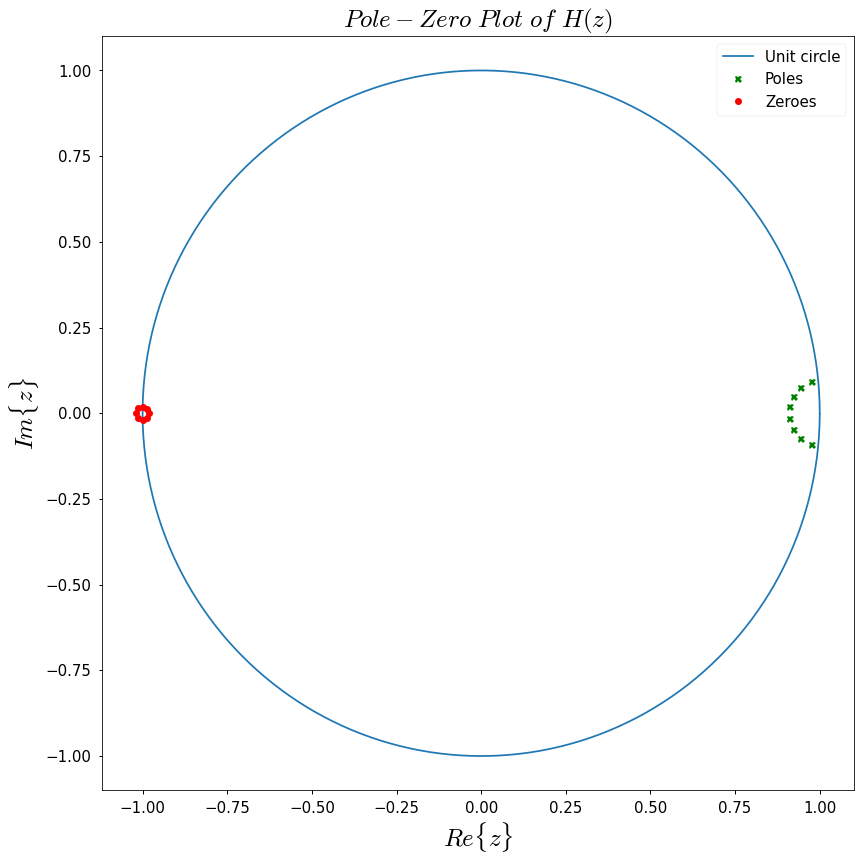

In [63]:
zeroes, poles, gain =sp.tf2zpk(num, denom)
theta=np.arange(0, 2*np.pi, 0.01)
fig, axs = plt.subplots(figsize=(12,12))
def plot(p, z, xaxis_label=None, yaxis_label=None, row=None):  
    axs.plot(np.cos(theta), np.sin(theta), label='Unit circle')
    axs.plot(np.real(p), np.imag(p), 'gX', label='Poles')
    axs.plot(np.real(z), np.imag(z), 'ro', label='Zeroes')
    axs.legend(loc = 'upper right', fontsize = 15)
    axs.set_title(r'$Pole-Zero\ Plot\ of\ H(z)$', fontsize = 25)
    axs.set_xlabel(xaxis_label, fontsize = 25)
    axs.set_ylabel(yaxis_label, fontsize = 25)
    axs.tick_params(axis="both", labelsize = 15)
    fig.tight_layout()
    
plot(poles, zeroes, xaxis_label=r'$Re\{z\}$', yaxis_label=r'$Im\{z\}$', row=0)
fig.savefig('fig1.png')





Part 3:

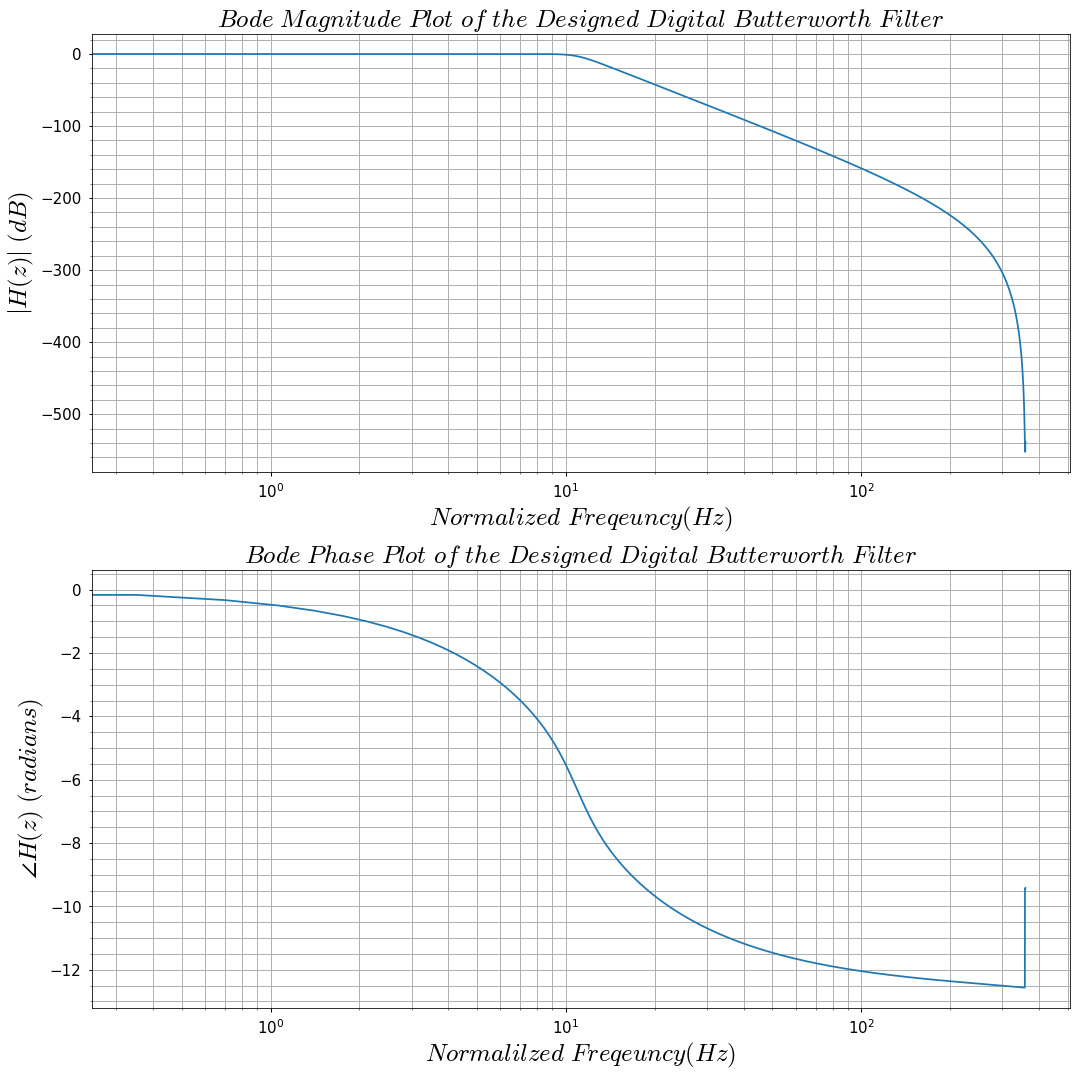

In [64]:
freq, mag = sp.freqz(num, denom, 1024)

title = ['$Bode\ Magnitude\ Plot\ of\ the\ Designed\ Digital\ Butterworth\ Filter$', '$Bode\ Phase\ Plot\ of\ the\ Designed\ Digital\ Butterworth\ Filter$']
fig, axs = plt.subplots(2, figsize=(15,15))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    if row == 0:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), 20*np.log10(np.abs(mag)))
    else:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), np.unwrap(np.angle(mag))) 

    axs[row].set_title(title[row], fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    fig.tight_layout()
    
plot_signal(freq, mag, xaxis_label=r'$Normalized\ Freqeuncy(Hz)$', yaxis_label=r'$|H(z)|\ (dB)$', row=0)
plot_signal(freq, mag, xaxis_label=r'$Normalilzed\ Freqeuncy(Hz)$', yaxis_label=r'$\angle H(z)\ (radians)$', row=1)

fig.savefig('fig2.png')



Part 4:

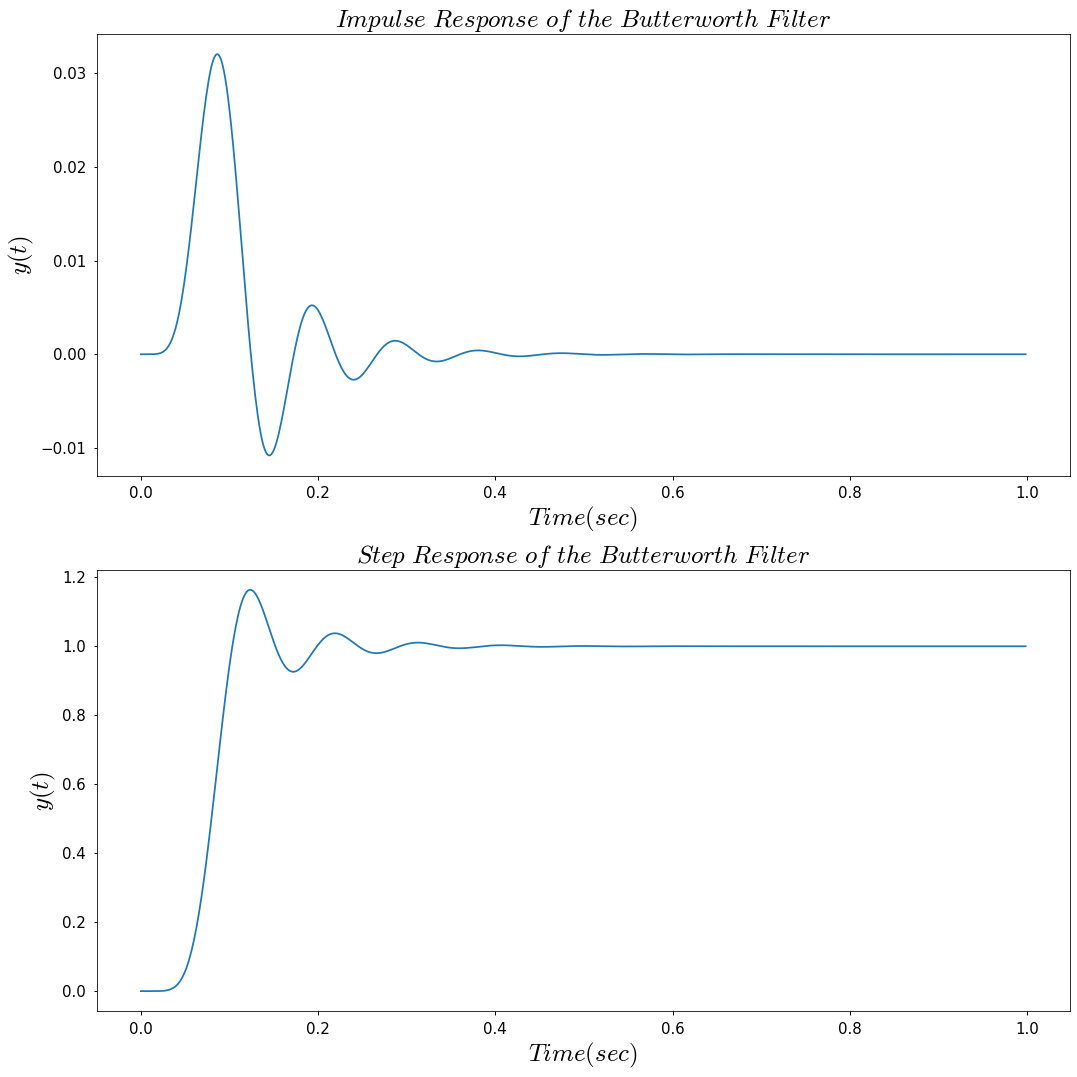

In [65]:
n=np.arange(0, Fs)
t=n/Fs
title_i= ['$Impulse\ Response\ of\ the\ Butterworth\ Filter$',
          '$Step\ Response\ of\ the\ Butterworth\ Filter$']
fig, axs = plt.subplots(2, figsize=(15,15))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].plot(x, y)
    axs[row].set_title(title_i[row], fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    fig.tight_layout()

impulse=np.hstack((np.array([1]), np.zeros((Fs-1))))
y1=sp.lfilter(num, denom, impulse)
step=np.ones((Fs))
y2=sp.lfilter(num, denom, step)
plot_signal(t, y1, xaxis_label=r'$Time (sec)$', yaxis_label=r'$y(t)$', row=0)
plot_signal(t, y2, xaxis_label=r'$Time (sec)$', yaxis_label=r'$y(t)$', row=1)

fig.savefig('fig3.png')

# **Problem** **2**.

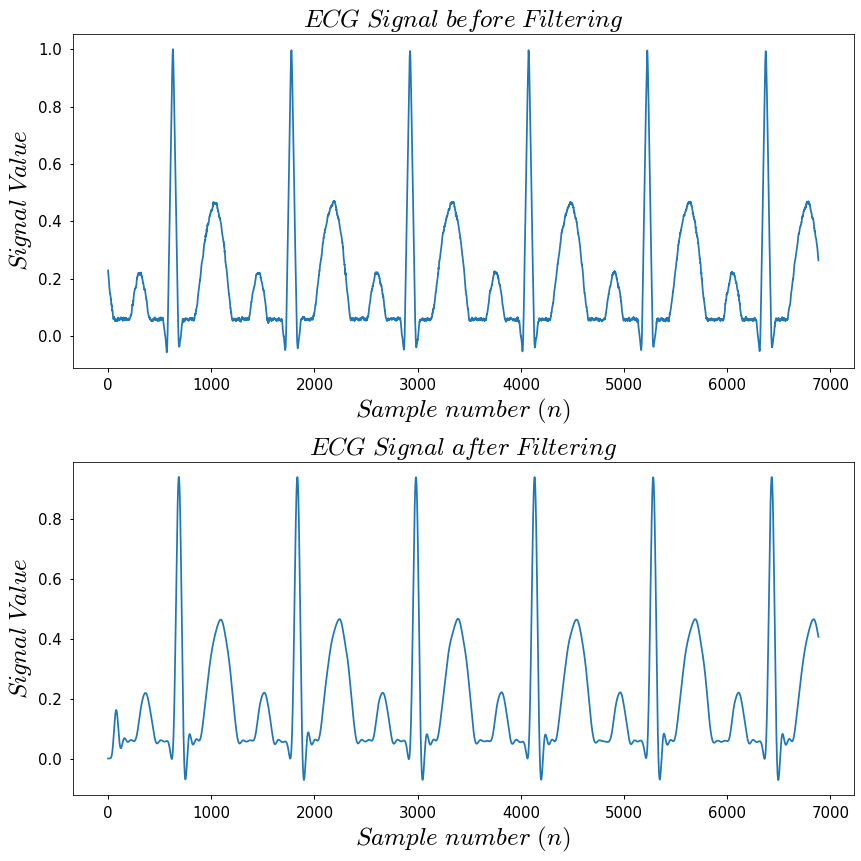

In [66]:
ecg = np.loadtxt('ECG_Data.txt')
ecgf = sp.lfilter(num, denom, ecg)

title_i= ['$ECG\ Signal\ before\ Filtering$',
          '$ECG\ Signal\ after\ Filtering$']
fig, axs = plt.subplots(2, figsize=(12,12))
def plot_signal(y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].plot(y)
    axs[row].set_title(title_i[row], fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    fig.tight_layout()


plot_signal(ecg, xaxis_label=r'$Sample\ number\ (n)$', yaxis_label=r'$Signal\ Value$', row=0)
plot_signal(ecgf, xaxis_label=r'$Sample\ number\ (n)$', yaxis_label=r'$Signal\ Value$', row=1)

fig.savefig('fig4.png')



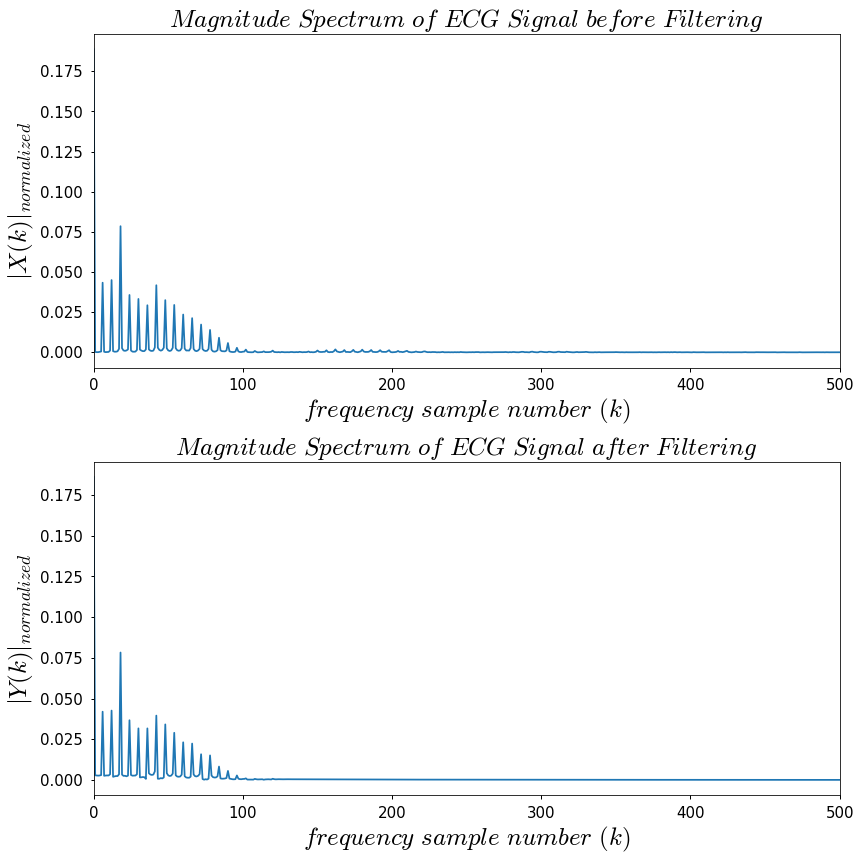

In [67]:
X=fft(ecg)/len(ecg)
k1=np.arange(len(ecg))
Y=fft(ecgf)/len(ecgf)
k2=np.arange(len(ecgf))

title_i= ['$Magnitude\ Spectrum\ of\ ECG\ Signal\ before\ Filtering$',
          '$Magnitude\ Spectrum\ of\ ECG\ Signal\ after\ Filtering$']
fig, axs = plt.subplots(2, figsize=(12,12))
def plot_i(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].plot(x, y)
    axs[row].set_xlim([0,500])
    axs[row].set_title(title_i[row], fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    fig.tight_layout()


plot_i(k1, np.abs(X), xaxis_label=r'$frequency\ sample\ number\ (k)$', yaxis_label=r'$|X(k)|_{normalized}$', row=0)
plot_i(k2, np.abs(Y), xaxis_label=r'$frequency\ sample\ number\ (k)$', yaxis_label=r'$|Y(k)|_{normalized}$', row =1)
fig.savefig('fig5.png')

# **Problem** **3**. <br>
Part 1:

Sampling rate of instrument : 11025Hz
Size of instrument signal: (36250,)


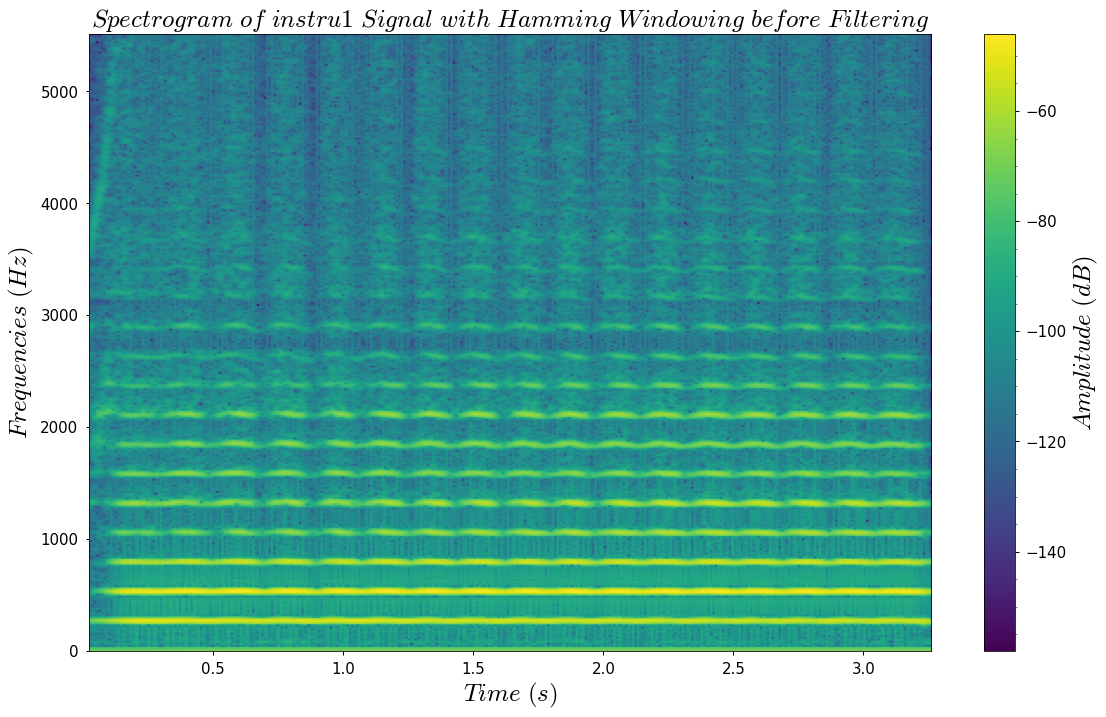

In [68]:
Fs1, track= wavfile.read('instru1.wav')
track = track/32767.0
print('Sampling rate of instrument : {}Hz'.format(Fs1))
print('Size of instrument signal: {}'.format(track.shape))
Nosi = 600
def specgram2d(y, N, Fs, window=None, ax=None, title=None):
  ax = plt.axes()
  ax.set_title(title, loc='center', wrap=True, fontsize = 25)
  if window=='hamming':
    ws=sp.windows.hamming(N)
  elif window=='hanning':
    ws=sp.windows.hanning(N)
  elif window=='blackman':
    ws=sp.windows.blackman(N)
  else:
    ws=sp.windows.boxcar(N)
  spec, freqs, t, im = ax.specgram(y, NFFT=N, Fs=Fs, window=ws, noverlap=500, scale='dB')
  ax.set_xlabel(r'$Time\ (s)$', fontsize = 25)
  ax.set_ylabel(r'$Frequencies\ (Hz)$', fontsize = 25)
  cbar = plt.colorbar(im, ax=ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 25)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 15)
  ax.tick_params(axis="both", labelsize = 15)
  fig4.tight_layout()



fig4, ax1 = plt.subplots(figsize=(16,10))
specgram2d(track, Nosi, Fs1, ax=ax1, window='hamming', title = r'$Spectrogram\ of\ instru1\ Signal\ with\ Hamming\ Windowing\ before\ Filtering$')
fig4.savefig('fig6.png')


display(Audio(data=track, rate=Fs1))

In [69]:
def find_ff(track, frequency):
  TRACK = fft(track)
  max_val = np.max(np.abs(TRACK))
  TRACK = TRACK/max_val
  for i in range (len(TRACK)):
    if (np.abs(TRACK[i])<=0.1):
      TRACK[i]=0;
    elif (i==0):
      TRACK[i]=0 

  TRACK_peaks = sp.find_peaks(np.abs(TRACK), prominence=0.6)[0] 
  fundamental_frequency = (TRACK_peaks[0]/len(TRACK)) *frequency
  return fundamental_frequency

ff_1 = find_ff(track, Fs1)

print('The Fundamental frequency of the instru1 audio signal before filtering: {} Hz'.format(ff_1))

The Fundamental frequency of the instru1 audio signal before filtering: 262.4710344827586 Hz


Part 2: <br>
From the above spectrogram we notice that the fundamental frequency (the first major peak after DC value) lies around the 230Hz range. Now in order to design a Butterwirth filter capable of extracting/filtering out the fundamental peak we choose the specifications of the filter to be as follows: passband
edges at 200Hz and300Hz, stopband edges at 100Hz and 400Hz, passband ripple of -3 dB, and an minimum stopband attenuation of 40 dB. 

In [70]:
Omegap=np.array([2*np.pi*200, 2*np.pi*300])
Omegas=np.array([2*np.pi*100, 2*np.pi*400])
delp=3
dels=40
Fs_f = Fs1 
omegap = Omegap/Fs_f
omegas = Omegas/Fs_f
Omegap1 = (2*Fs_f)*np.tan(omegap/2) 
Omegas1 = (2*Fs_f)*np.tan(omegas/2)
N, Omegac=sp.buttord (Omegap1, Omegas1, delp, dels, analog=True)
Num, D =  sp.butter(N, Omegac, btype='bandpass', analog=True, output='ba')
Nume, Denum = sp.bilinear(Num, D, Fs_f)
y = sp.lfilter(Nume, Denum, track)
wavfile.write('instru1_filtered.wav', Fs1, (32767*y).astype(np.int16))
Fs2, track2= wavfile.read('instru1_filtered.wav')
display(Audio(data=track2, rate=Fs2))

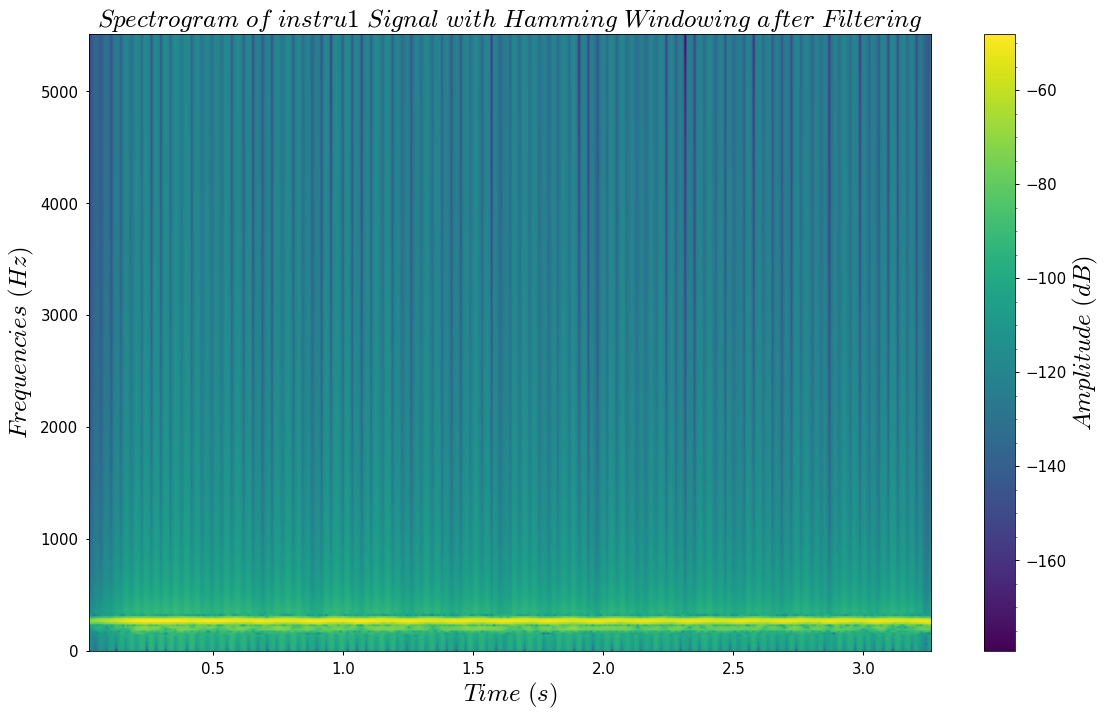

In [71]:
Nosi = 600
def specgram2d(y, N, Fs, window=None, ax=None, title=None):
  ax = plt.axes()
  ax.set_title(title, loc='center', wrap=True, fontsize = 25)
  if window=='hamming':
    ws=sp.windows.hamming(N)
  elif window=='hanning':
    ws=sp.windows.hanning(N)
  elif window=='blackman':
    ws=sp.windows.blackman(N)
  else:
    ws=sp.windows.boxcar(N)
  spec, freqs, t, im = ax.specgram(y, NFFT=N, Fs=Fs, window=ws, noverlap=500, scale='dB')
  ax.set_xlabel(r'$Time\ (s)$', fontsize = 25)
  ax.set_ylabel(r'$Frequencies\ (Hz)$', fontsize = 25)
  cbar = plt.colorbar(im, ax=ax)
  cbar.set_label(r'$Amplitude\ (dB)$', fontsize = 25)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 15)
  ax.tick_params(axis="both", labelsize = 15)
  fig4.tight_layout()

fig4, ax1 = plt.subplots(figsize=(16,10))
specgram2d(y, Nosi, Fs1, ax=ax1, window='hamming', title = r'$Spectrogram\ of\ instru1\ Signal\ with\ Hamming\ Windowing\ after\ Filtering$')
fig4.savefig('fig10.png')

In [72]:
def find_ff(track, frequency):
  TRACK = fft(track)
  max_val = np.max(np.abs(TRACK))
  TRACK = TRACK/max_val
  for i in range (len(TRACK)):
    if (np.abs(TRACK[i])<=0.1):
      TRACK[i]=0;
    elif (i==0):
      TRACK[i]=0 

  TRACK_peaks = sp.find_peaks(np.abs(TRACK), prominence=0.6)[0] 
  fundamental_frequency = (TRACK_peaks[0]/len(TRACK)) *frequency
  return fundamental_frequency

ff_2 = find_ff(track2, Fs2)

print('The Fundamental frequency of the instru1 audio signal after filtering: {} Hz'.format(ff_2))

The Fundamental frequency of the instru1 audio signal after filtering: 262.4710344827586 Hz


# **Problem** **4**. <br>
Part 1:
In case of the Chebyshev Filter design, the procedure is similar to the case of Butterworth Filter design as seen in Problem 1 untill the point where we arrive at the slectivity ok the said filter. Here we find the order of the filter using the expression  $N = \frac{cosh^{-1}(\frac{1}{\epsilon}\sqrt{\frac{1-\delta_{s}^{2}}{\delta_{s}^{2}}})}{cosh^{-1}(\frac{\Omega_{s}}{\Omega_{p}})}$ = 5 <br>

In [73]:
Fs=720
T=1/Fs
Omega_p=10*2*np.pi
Omega_s=20*2*np.pi
delp=a
dels=40
omega_p=Omega_p/Fs
omega_s=Omega_s/Fs
Omega_p1=(2/T)*np.tan(omega_p/2)
Omega_s1=(2/T)*np.tan(omega_s/2)
N, Omega_c=sp.cheb1ord(Omega_p1, Omega_s1, delp, dels, analog=True)
n, d = sp.cheby1(N, delp, Omega_c, btype='low', analog=True, output='ba')
nu, dn=sp.bilinear(n, d, fs=Fs)


Part 2:

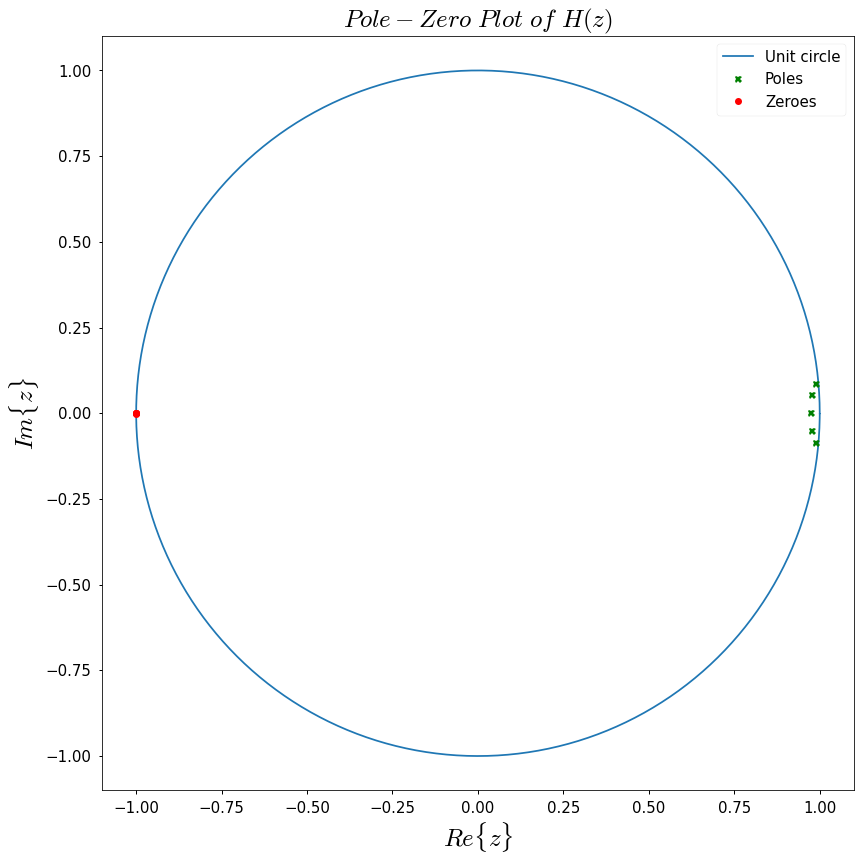

In [74]:
zeroes, poles, gain =sp.tf2zpk(nu, dn)
theta=np.arange(0, 2*np.pi, 0.01)
fig, axs = plt.subplots(figsize=(12,12))
def plot(p, z, xaxis_label=None, yaxis_label=None, row=None):  
    axs.plot(np.cos(theta), np.sin(theta), label='Unit circle')
    axs.plot(np.real(p), np.imag(p), 'gX', label='Poles')
    axs.plot(np.real(z), np.imag(z), 'ro', label='Zeroes')
    axs.legend(loc = 'upper right', fontsize = 15)
    axs.set_title(r'$Pole-Zero\ Plot\ of\ H(z)$', fontsize = 25)
    axs.set_xlabel(xaxis_label, fontsize = 25)
    axs.set_ylabel(yaxis_label, fontsize = 25)
    axs.tick_params(axis="both", labelsize = 15)
    fig.tight_layout()
    
plot(poles, zeroes, xaxis_label=r'$Re\{z\}$', yaxis_label=r'$Im\{z\}$', row=0)
fig.savefig('fig7.png')

Part 3:

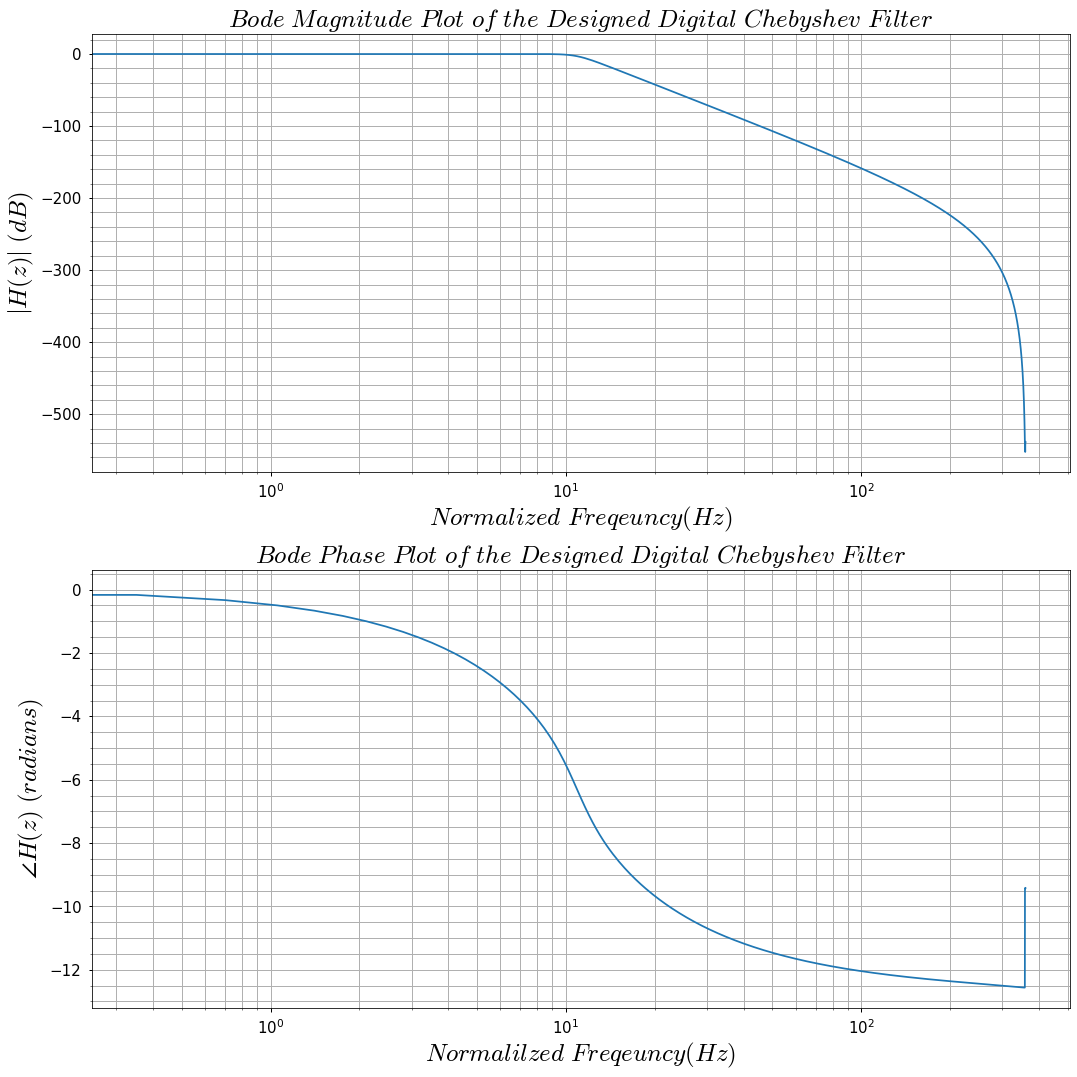

In [75]:
freqs, mags = sp.freqz(nu, dn, 1024)

title = ['$Bode\ Magnitude\ Plot\ of\ the\ Designed\ Digital\ Chebyshev\ Filter$', '$Bode\ Phase\ Plot\ of\ the\ Designed\ Digital\ Chebyshev\ Filter$']
fig, axs = plt.subplots(2, figsize=(15,15))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    if row == 0:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), 20*np.log10(np.abs(mag)))
    else:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), np.unwrap(np.angle(mag))) 

    axs[row].set_title(title[row], fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    fig.tight_layout()
    
plot_signal(freqs, mags, xaxis_label=r'$Normalized\ Freqeuncy(Hz)$', yaxis_label=r'$|H(z)|\ (dB)$', row=0)
plot_signal(freqs, mags, xaxis_label=r'$Normalilzed\ Freqeuncy(Hz)$', yaxis_label=r'$\angle H(z)\ (radians)$', row=1)

fig.savefig('fig8.png')

Part 4:

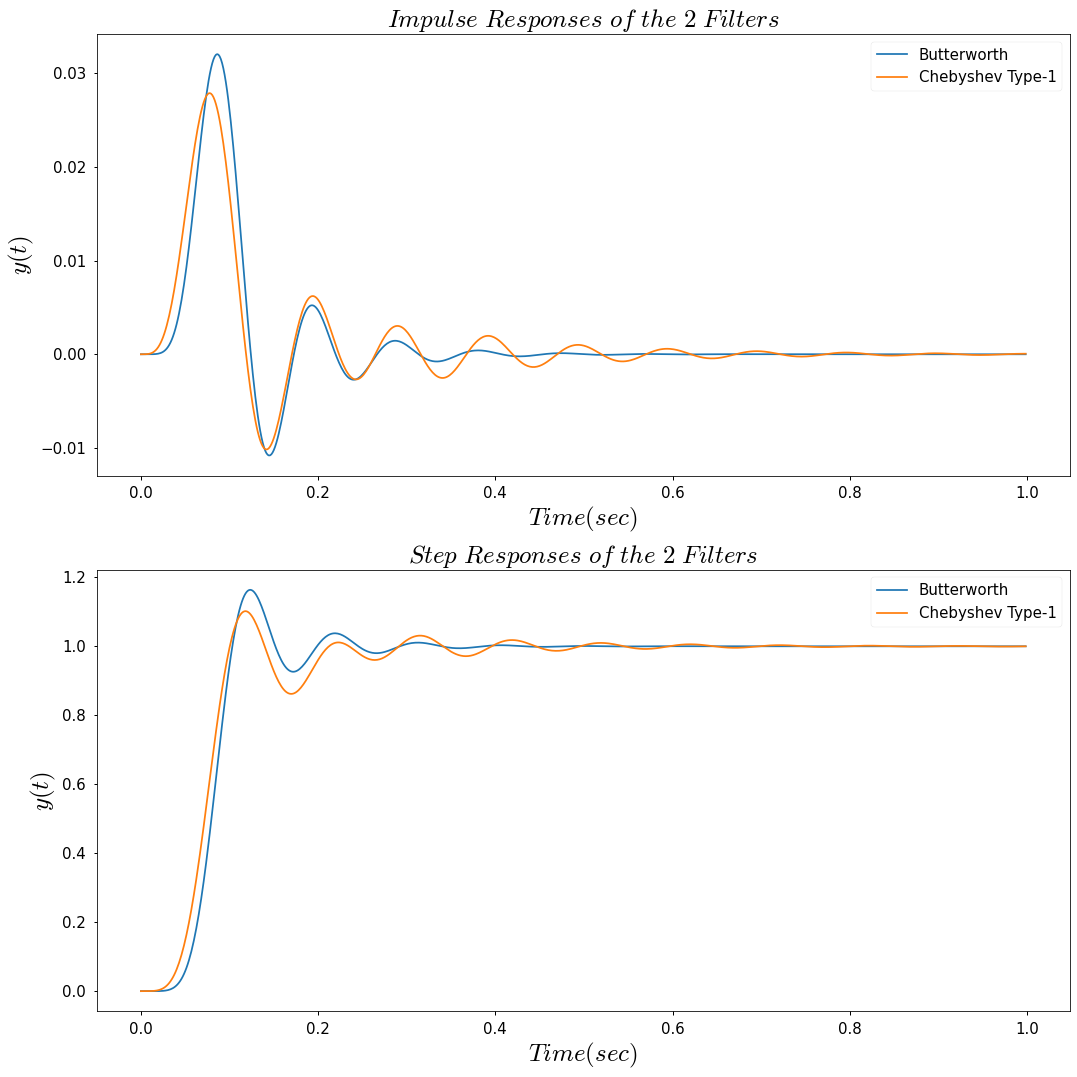

In [76]:
n=np.arange(0, Fs)
t=n/Fs
title_i= ['$Impulse\ Responses\ of\ the\ 2\ Filters$',
          '$Step\ Responses\ of\ the\ 2\ Filters$']
lab = ['Butterworth', 'Chebyshev Type-1']
fig, axs = plt.subplots(2, figsize=(15,15))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None, l =None):  
    axs[row].plot(x, y, label = lab[l])
    axs[row].legend(loc = 'upper right', fontsize = 15)
    axs[row].set_title(title_i[row], fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    fig.tight_layout()

impulse=np.hstack((np.array([1]), np.zeros((Fs-1))))
y1=sp.lfilter(num, denom, impulse)
y1_c=sp.lfilter(nu, dn, impulse)
step=np.ones((Fs))
y2=sp.lfilter(num, denom, step)
y2_c=sp.lfilter(nu, dn, step)
plot_signal(t, y1, xaxis_label=r'$Time (sec)$', yaxis_label=r'$y(t)$', row=0, l = 0)
plot_signal(t, y1_c, xaxis_label=r'$Time (sec)$', yaxis_label=r'$y(t)$', row=0, l = 1)
plot_signal(t, y2, xaxis_label=r'$Time (sec)$', yaxis_label=r'$y(t)$', row=1, l = 0)
plot_signal(t, y2_c, xaxis_label=r'$Time (sec)$', yaxis_label=r'$y(t)$', row=1, l = 1)

fig.savefig('fig9.png')